<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data Analysis and Prediction

---

# Problem Statement
This project aim to determine which feature variables are most likely to impact the property sale price of a home in Ames. With the defined exploratory features, we can further predict the housing price by using regression model. All these information are intend to provide a guideline to the stakeholder of Ames city housing developer.

# Background
Based on a United States Census Bureau report in 2010, Ames, Iowa had a population of approximately 59,000. Also, Ames, Iowa economy and demographics is largely defined by the Iowa State University, a public research university located in the middle of the city. More than 75%  of Ames' population is either studying as a student or working as a faculty at Iowa State University, making Ames one large extended campus. 

Housing prices have steadily increased over the course of the past three decades with the exception of severe economic downturns such as the economic recession of 2008. The housing market is not only a very strong economic indicator but it has a financial impact on anyone looking to own a home themselves.

As a member of the Ames Iowa city housing developer, the stakeholder would like to understand the features which are most likely to impact housing price and to make prediction on te price of a house at sale. In order to achieve the targets, Ames Iowa Housing Dataset from Kaggle will be used. Furthermore, regression model will be created based on the Ames Iowa Housing Dataset. This model will enable us to make prediction on the price of a house at sale.

The Ames Housing Dataset is a public dataset made available by Kaggle. The dataset is a record of houses sold in Ames between the years 2006 and 2010 with each entry being represented by 81 exploratory data variables and the sale price of a house.  


## Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


import statsmodels.api as sm

## Data Cleaning for Train Dataset

In [2]:
train = pd.read_csv("./datasets/train.csv")
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
train.shape

(2051, 81)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [6]:
# getting %nulls for cols with missing values
missing_train = pd.DataFrame(train.isna().sum()).reset_index()
missing_train.columns = ['col', 'num_nulls'] # updating all col names in missing_df
missing_train['%nulls'] = missing_train['num_nulls']*100/len(train)#creating a new col for %nulls (num_nulls/df_len)
missing_train[missing_train['num_nulls']>0].sort_values(by='num_nulls', ascending=False) # filter to only cols with any nulls

,col,num_nulls,%nulls
73,Pool QC,2042,99.561190
75,Misc Feature,1986,96.830814
7,Alley,1911,93.174061
74,Fence,1651,80.497318
58,Fireplace Qu,1000,48.756704
4,Lot Frontage,330,16.089712
60,Garage Yr Blt,114,5.558264
65,Garage Cond,114,5.558264
64,Garage Qual,114,5.558264
61,Garage Finish,114,5.558264


### Drop Columns
As observed from the table able, there are 3 columns which have more than 90% missing data. Therefore, we will drop 'Pool QC', 'Misc Feature' and 'Alley' in this case.

In [7]:
train.drop(columns=['Alley', 'Pool QC', 'Misc Feature'], inplace=True)

### Handling Missing Data
Examine column by column from the higher percentage of null data. First of all, we check the unique value/data in every columns which consist of missing data.

In [8]:
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [9]:
train['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [10]:
train['Fireplace Qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [11]:
train['Fireplaces'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [12]:
train['Lot Frontage'].value_counts(dropna=False)

NaN      330
60.0     179
70.0      96
80.0      94
50.0      90
        ... 
119.0      1
122.0      1
22.0       1
155.0      1
135.0      1
Name: Lot Frontage, Length: 119, dtype: int64

In [13]:
train['Garage Yr Blt'].value_counts(dropna=False)

NaN       114
2005.0    105
2007.0     84
2006.0     80
2004.0     72
         ... 
1918.0      1
2207.0      1
1933.0      1
1895.0      1
1919.0      1
Name: Garage Yr Blt, Length: 101, dtype: int64

In [14]:
train['Garage Cond'].unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [15]:
train['Garage Qual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [16]:
train['Garage Finish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [17]:
train['Garage Type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [18]:
train['Bsmt Exposure'].unique()

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

In [19]:
train['BsmtFin Type 2'].unique()

array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [20]:
train['Bsmt Cond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [21]:
train['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

In [22]:
train['BsmtFin Type 1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

In [23]:
train['Mas Vnr Area'].value_counts(dropna=False)

0.0      1216
NaN        22
120.0      11
176.0      10
200.0      10
         ... 
142.0       1
215.0       1
235.0       1
233.0       1
426.0       1
Name: Mas Vnr Area, Length: 374, dtype: int64

In [24]:
train['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

#### Target missing data for all the object type:

In [25]:
cols = ['Fence','Fireplace Qu','Garage Cond','Garage Qual','Garage Finish','Garage Type','Bsmt Exposure','BsmtFin Type 2','Bsmt Cond','Bsmt Qual','BsmtFin Type 1','Mas Vnr Type']
train[cols] = train[cols].replace(np.nan, 'NA')
train[cols].isnull().sum() 

Fence             0
Fireplace Qu      0
Garage Cond       0
Garage Qual       0
Garage Finish     0
Garage Type       0
Bsmt Exposure     0
BsmtFin Type 2    0
Bsmt Cond         0
Bsmt Qual         0
BsmtFin Type 1    0
Mas Vnr Type      0
dtype: int64

In [26]:
cols = ["Weight","Height","BootSize","SuitSize","Type"]
train['Fence'] = train['Fence'].replace(np.nan, 'NA')

#### Target missing data for all the value type:

In [27]:
train['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [28]:
train.fillna(train['Lot Frontage'].mean(), inplace=True)
train['Lot Frontage'].isnull().sum() 

0

In [29]:
train['Mas Vnr Area'] = train['Mas Vnr Area'].replace('nan', np.nan).fillna(0.0)
train['Mas Vnr Area'].isnull().sum() 

0

In [30]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].replace('nan', np.nan).fillna(0.0)
train['Garage Yr Blt'].isnull().sum()

0

#### Target missing data for columns with 1 or 2 null data:

In [31]:
train['Bsmt Full Bath'].value_counts(dropna=False)

0.0000     1200
1.0000      824
2.0000       23
69.0552       2
3.0000        2
Name: Bsmt Full Bath, dtype: int64

In [32]:
train['Total Bsmt SF'].value_counts(dropna=False)

0.0       54
864.0     51
672.0     20
1040.0    20
912.0     17
          ..
1508.0     1
1840.0     1
423.0      1
2461.0     1
1932.0     1
Name: Total Bsmt SF, Length: 893, dtype: int64

In [33]:
train['Bsmt Unf SF'].value_counts(dropna=False)

0.0       165
384.0      14
672.0      11
728.0      10
216.0       9
         ... 
739.0       1
577.0       1
117.0       1
1491.0      1
994.0       1
Name: Bsmt Unf SF, Length: 968, dtype: int64

In [34]:
train['BsmtFin SF 2'].value_counts(dropna=False)

0.0       1803
294.0        5
483.0        3
72.0         3
180.0        3
          ... 
497.0        1
211.0        1
1474.0       1
532.0        1
750.0        1
Name: BsmtFin SF 2, Length: 206, dtype: int64

In [35]:
train['Garage Cars'].value_counts(dropna=False)

2.0000     1136
1.0000      524
3.0000      263
0.0000      113
4.0000       13
5.0000        1
69.0552       1
Name: Garage Cars, dtype: int64

In [36]:
train['Garage Area'].value_counts(dropna=False)

0.0      113
440.0     70
576.0     69
484.0     52
528.0     46
        ... 
399.0      1
859.0      1
100.0      1
401.0      1
217.0      1
Name: Garage Area, Length: 515, dtype: int64

In [37]:
train['BsmtFin SF 1'].value_counts(dropna=False)

0.0       657
24.0       17
16.0       10
20.0        7
300.0       7
         ... 
1290.0      1
310.0       1
54.0        1
1440.0      1
155.0       1
Name: BsmtFin SF 1, Length: 822, dtype: int64

In [38]:
cols_2 = ['Bsmt Full Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','Garage Cars','Garage Area','BsmtFin SF 1']
train[cols_2] = train[cols_2].replace('nan', np.nan).fillna(0.0)
train[cols_2].isnull().sum() 

Bsmt Full Bath    0
Total Bsmt SF     0
Bsmt Unf SF       0
BsmtFin SF 2      0
Garage Cars       0
Garage Area       0
BsmtFin SF 1      0
dtype: int64

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

All train data are clean now.

### Mapping

In [40]:
#Mapping string values to numerical values
train['Fence'] = train['Fence'].map({'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})
train['Fireplace Qu'] = train['Fireplace Qu'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['Garage Cond'] = train['Garage Cond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['Garage Finish'] = train['Garage Finish'].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
train['Bsmt Exposure'] = train['Bsmt Exposure'].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train['Bsmt Cond'] = train['Bsmt Cond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['Bsmt Qual'] = train['Bsmt Qual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [41]:
#Mapping those string values to numerical values from non-missing data columns
train['Lot Shape'] = train['Lot Shape'].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})
train['Utilities'] = train['Utilities'].map({'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3})
train['Land Slope'] = train['Land Slope'].map({'Sev': 0, 'Mod': 1, 'Gtl': 2})
train['Exter Qual'] = train['Exter Qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})
train['Exter Cond'] = train['Exter Cond'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})
train['Heating QC'] = train['Heating QC'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})
train['Electrical'] = train['Electrical'].map({'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr':4})
train['Kitchen Qual'] = train['Kitchen Qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})
train['Functional'] = train['Functional'].map({'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
train['Paved Drive'] = train['Paved Drive'].map({'N': 0, 'P': 1, 'Y': 2})

## Data Cleaning for Test Dataset

In [42]:
test = pd.read_csv("./datasets/test.csv")
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [43]:
test.shape

(878, 80)

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [45]:
missing_test = pd.DataFrame(test.isna().sum()).reset_index()
missing_test.columns = ['col', 'num_nulls'] # updating all col names in missing_df
missing_test['%nulls'] = missing_test['num_nulls']*100/len(test)#creating a new col for %nulls (num_nulls/df_len)
missing_test[missing_test['num_nulls']>0].sort_values(by='num_nulls', ascending=False) # filter to only cols with any nulls

,col,num_nulls,%nulls
73,Pool QC,874,99.544419
75,Misc Feature,837,95.330296
7,Alley,820,93.394077
74,Fence,706,80.410023
58,Fireplace Qu,422,48.063781
4,Lot Frontage,160,18.223235
60,Garage Yr Blt,45,5.125285
61,Garage Finish,45,5.125285
64,Garage Qual,45,5.125285
65,Garage Cond,45,5.125285


### Drop Columns
Dropping columns same as train dataset as there are still missing >90% data in test dataset.

In [46]:
test.drop(columns=['Alley', 'Pool QC', 'Misc Feature'], inplace=True)

### Handling Missing Data

#### Target missing data for all the value type:

In [47]:
cols = ['Fence','Fireplace Qu','Garage Cond','Garage Qual','Garage Finish','Garage Type','Bsmt Exposure','BsmtFin Type 2','Bsmt Cond','Bsmt Qual','BsmtFin Type 1','Mas Vnr Type']
test[cols] = test[cols].replace(np.nan, 'NA')
test[cols].isnull().sum() 

Fence             0
Fireplace Qu      0
Garage Cond       0
Garage Qual       0
Garage Finish     0
Garage Type       0
Bsmt Exposure     0
BsmtFin Type 2    0
Bsmt Cond         0
Bsmt Qual         0
BsmtFin Type 1    0
Mas Vnr Type      0
dtype: int64

#### Target missing data for all the value type:

In [48]:
test.fillna(test['Lot Frontage'].mean(), inplace=True)
test['Lot Frontage'].isnull().sum() 

0

In [49]:
test['Mas Vnr Area'] = test['Mas Vnr Area'].replace('nan', np.nan).fillna(0.0)
test['Mas Vnr Area'].isnull().sum() 

0

In [50]:
test['Garage Yr Blt'] = test['Garage Yr Blt'].replace('nan', np.nan).fillna(0.0)
test['Garage Yr Blt'].isnull().sum()

0

#### Target last missing data columns with 1 null data:

In [51]:
test['Electrical'].value_counts(dropna=False)

SBrkr                813
FuseA                 48
FuseF                 15
FuseP                  1
69.54596100278552      1
Name: Electrical, dtype: int64

In [52]:
test['Electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', 69.54596100278552],
      dtype=object)

In [53]:
test['Electrical'] = test['Electrical'].apply(str)

In [54]:
test['Electrical'] = test['Electrical'].replace('69.54596100278552', 'Mix')
train['Mas Vnr Area'].isnull().sum() 

0

In [55]:
test['Electrical'].value_counts(dropna=False)

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Mix        1
Name: Electrical, dtype: int64

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     878 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Lot Shape        878 non-null    object 
 8   Land Contour     878 non-null    object 
 9   Utilities        878 non-null    object 
 10  Lot Config       878 non-null    object 
 11  Land Slope       878 non-null    object 
 12  Neighborhood     878 non-null    object 
 13  Condition 1      878 non-null    object 
 14  Condition 2      878 non-null    object 
 15  Bldg Type        878 non-null    object 
 16  House Style      878 non-null    object 
 17  Overall Qual    

All test data are clean now.

### Mapping

In [57]:
#Mapping string values to numerical values
test['Fence'] = test['Fence'].map({'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})
test['Fireplace Qu'] = test['Fireplace Qu'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test['Garage Cond'] = test['Garage Cond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test['Garage Finish'] = test['Garage Finish'].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
test['Bsmt Exposure'] = test['Bsmt Exposure'].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
test['Bsmt Cond'] = test['Bsmt Cond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test['Bsmt Qual'] = test['Bsmt Qual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [58]:
#Mapping those string values to numerical values from non-missing data columns
test['Lot Shape'] = test['Lot Shape'].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})
test['Utilities'] = test['Utilities'].map({'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3})
test['Land Slope'] = test['Land Slope'].map({'Sev': 0, 'Mod': 1, 'Gtl': 2})
test['Exter Qual'] = test['Exter Qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})
test['Exter Cond'] = test['Exter Cond'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})
test['Heating QC'] = test['Heating QC'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})
test['Electrical'] = test['Electrical'].map({'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr':4})
test['Kitchen Qual'] = test['Kitchen Qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})
test['Functional'] = test['Functional'].map({'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
test['Paved Drive'] = test['Paved Drive'].map({'N': 0, 'P': 1, 'Y': 2})

In [59]:
import os
if not os.path.exists('datasets'):
    os.makedirs('datasets')
train.to_csv('datasets/train_cleaned.csv')
test.to_csv('datasets/test_cleaned.csv')

# Exploratory Data Analysis (EDA) & Visualisation

## Correlation Matrix

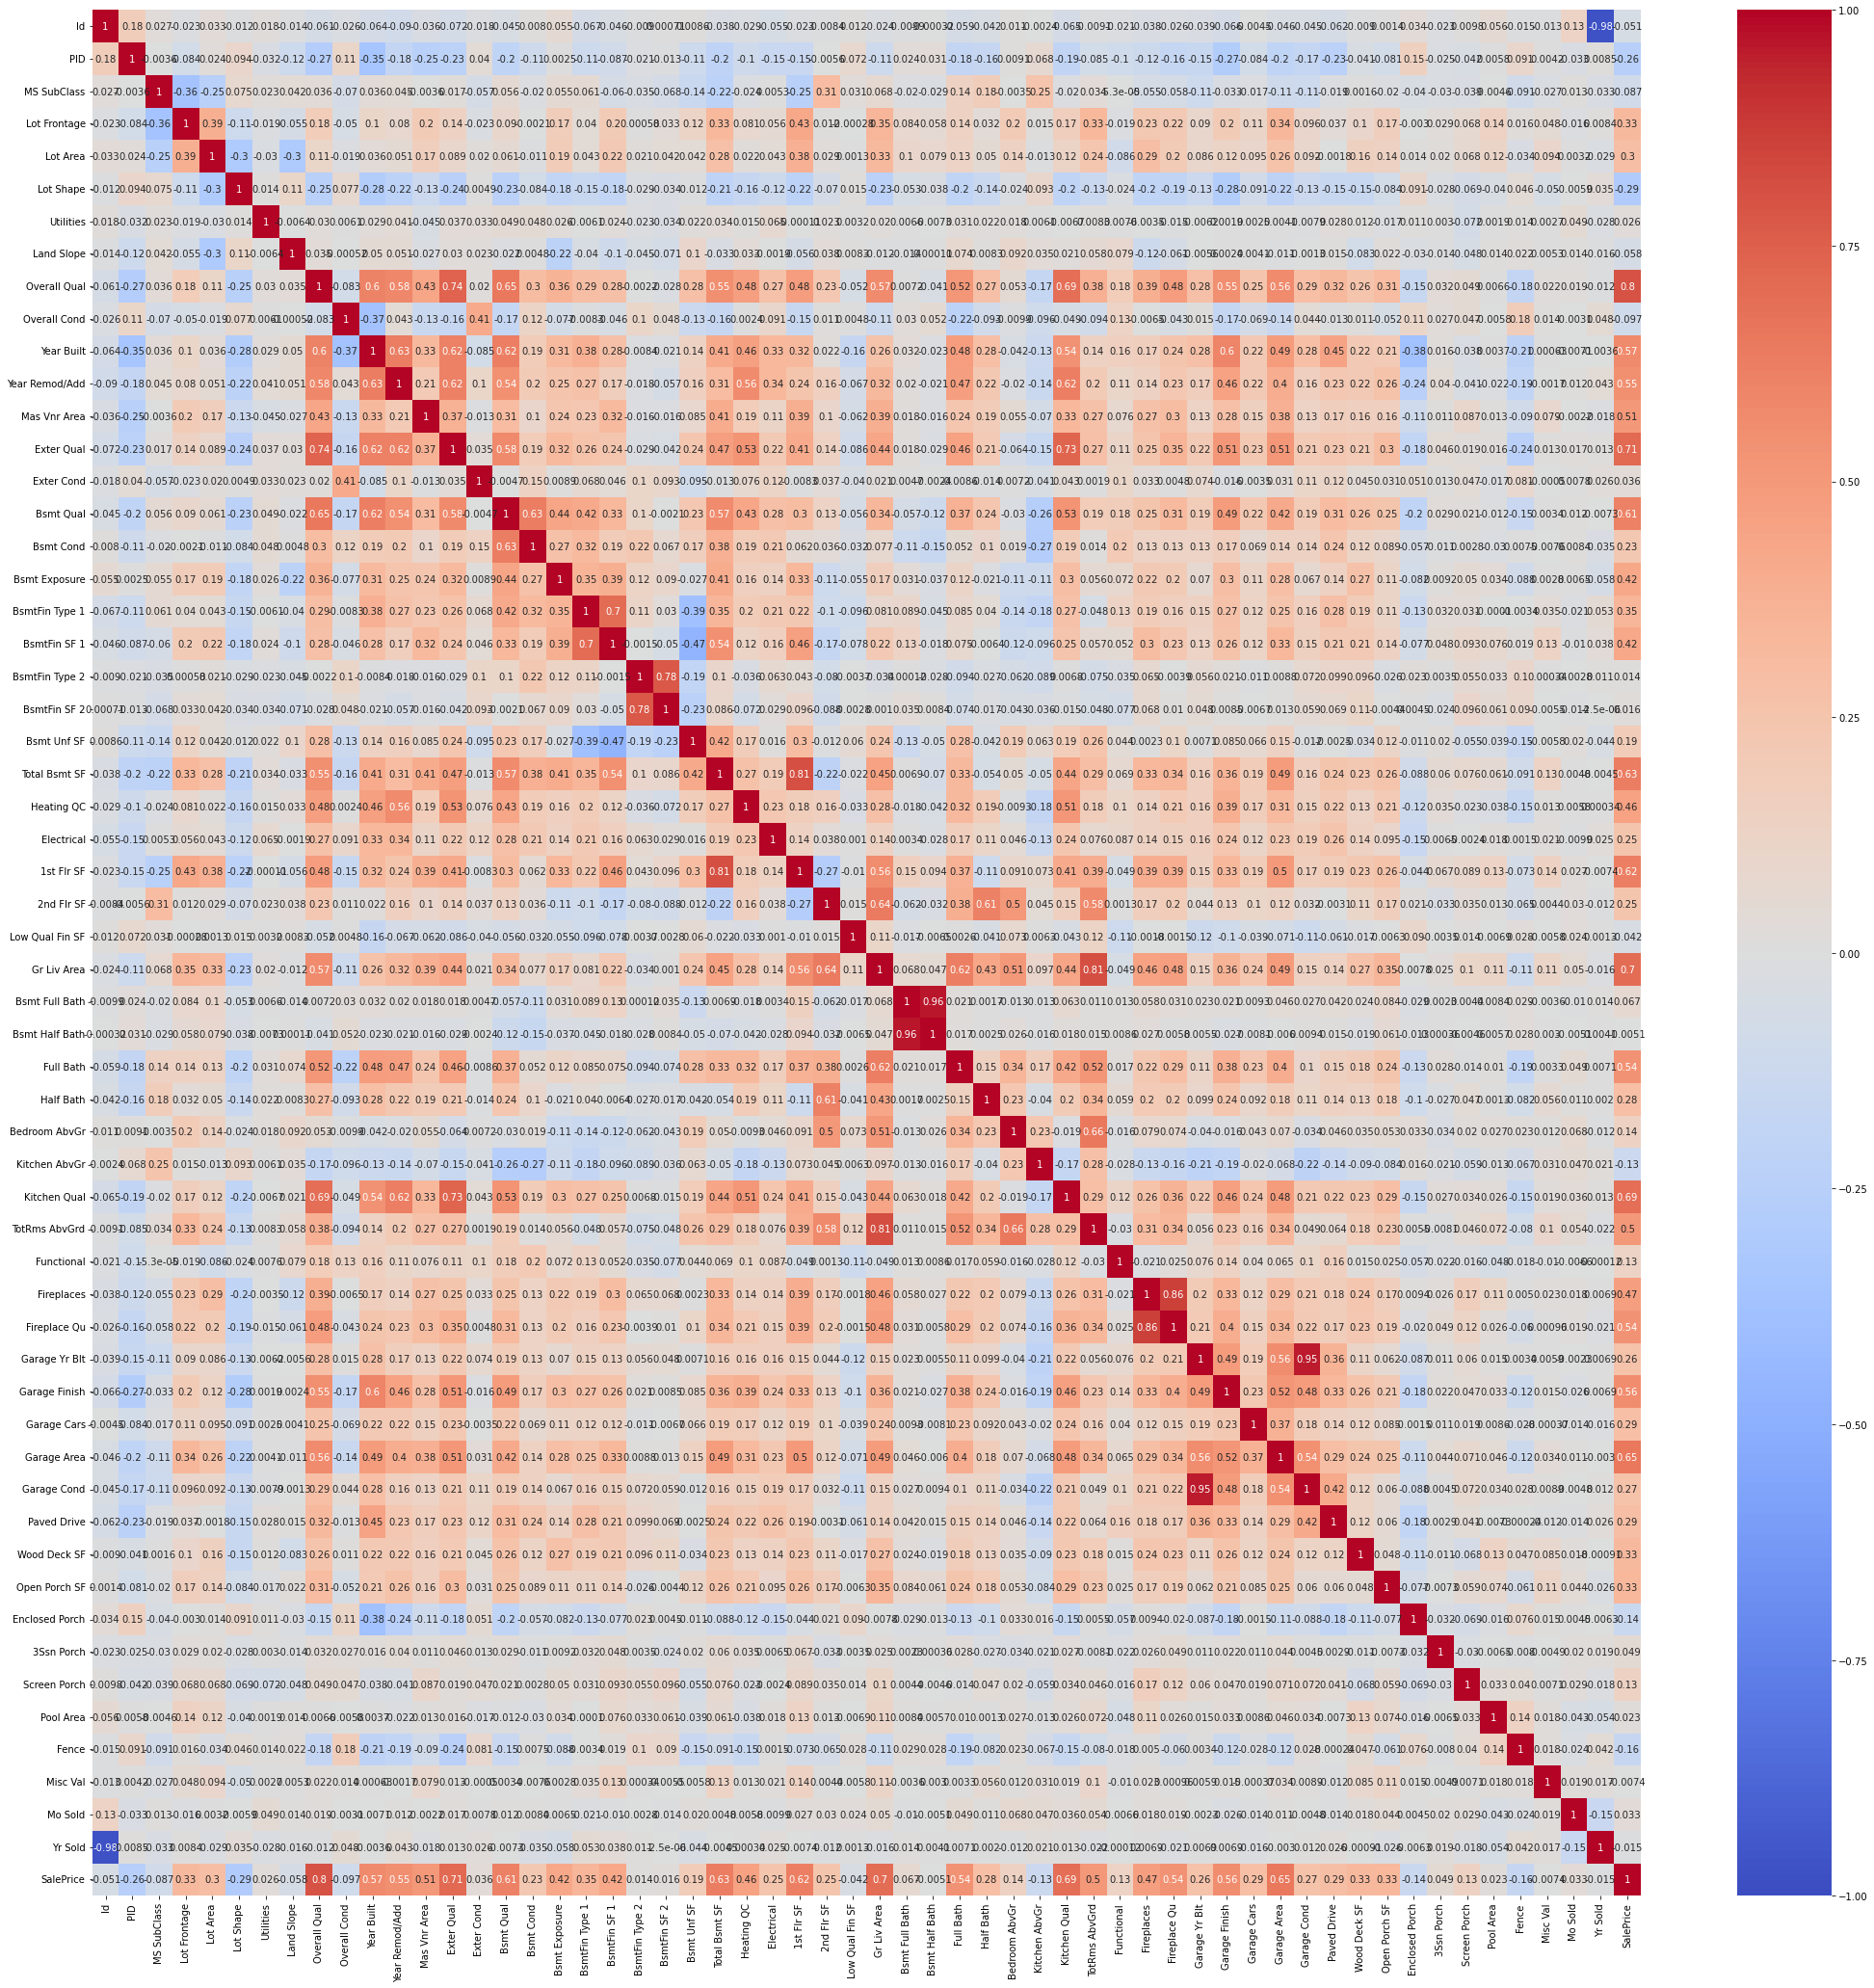

In [60]:
plt.figure(figsize = (36,36))
sns.heatmap(train.corr(), vmin = -1, annot = True, cmap = 'coolwarm');

## Distribution of Categorical Columns

In [61]:
categorical_columns = train.select_dtypes(include='object')

In [62]:
list(enumerate(categorical_columns))

[(0, 'MS Zoning'),
 (1, 'Street'),
 (2, 'Land Contour'),
 (3, 'Lot Config'),
 (4, 'Neighborhood'),
 (5, 'Condition 1'),
 (6, 'Condition 2'),
 (7, 'Bldg Type'),
 (8, 'House Style'),
 (9, 'Roof Style'),
 (10, 'Roof Matl'),
 (11, 'Exterior 1st'),
 (12, 'Exterior 2nd'),
 (13, 'Mas Vnr Type'),
 (14, 'Foundation'),
 (15, 'Heating'),
 (16, 'Central Air'),
 (17, 'Garage Type'),
 (18, 'Garage Qual'),
 (19, 'Sale Type')]

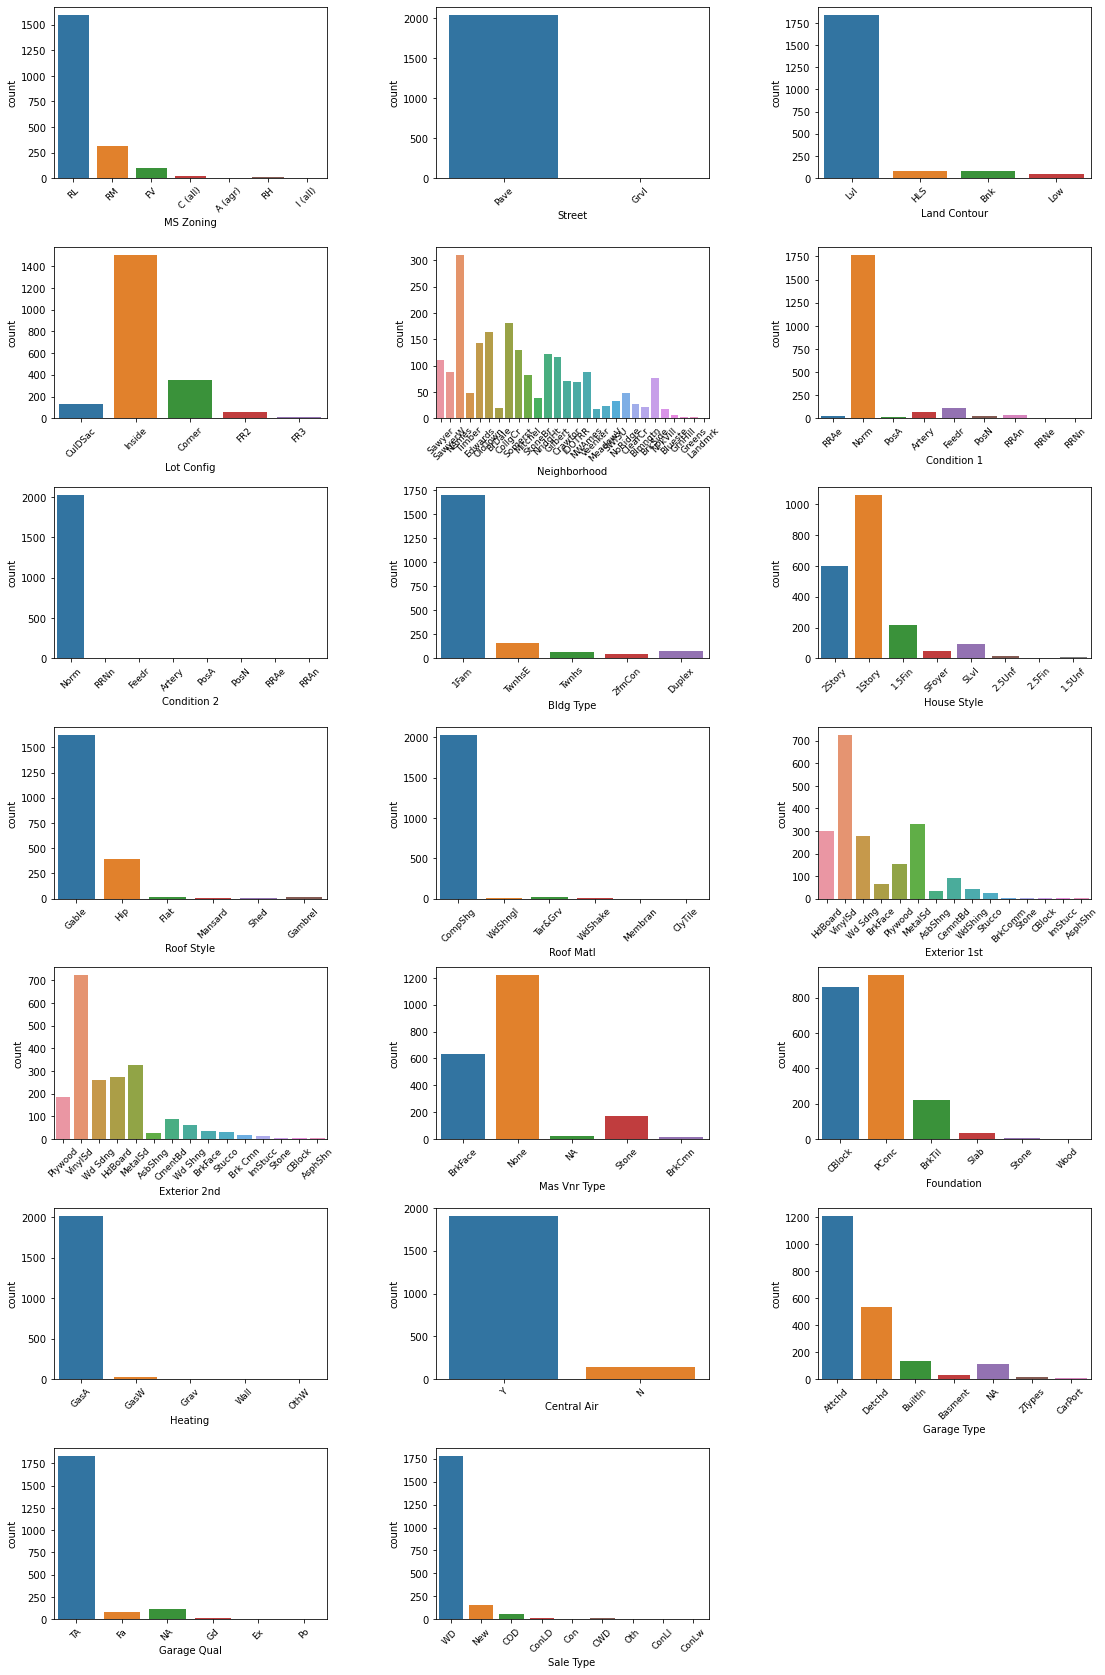

In [63]:
plt.figure(figsize = (18, 28))
for i in enumerate(categorical_columns):
    plt.subplot(7, 3, i[0]+1,)
    sns.countplot(x=i[1], data = train)
    plt.xticks(rotation = 45, fontsize=9)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Most of the distribution on nominal columns are showing left skewed. Some columns such as 'Street', 'Condition 2', 'Roof Style', 'Roof Matl', 'Heating', and 'Central Air' display dominant to 1 nominal value, some to the extend whereby all other nominal values are close to neglible. We will drop these columns as they are severely skewed distribution which are not favorable in term of using linear regression to predict Sale Price.


Let's examine those columns with more fluctuated counts and which might interact with saleprice, such as location.  In this case, `MS Zoning` and `Neighborhood` can represent the location.

### Boxplot of `SalePrice` by `MS Zoning` and `Neighborhood`

In [64]:
# custom function for drawing scatterplot
def boxplot(dataframe, col1, col2, title,color=None):
    sns.boxplot(x=dataframe[col1],y=dataframe[col2])
    plt.xticks(rotation=90)
    plt.title(title,fontsize=14)
    plt.xlabel(col1,fontsize=12)
    plt.ylabel(col2,fontsize=12)

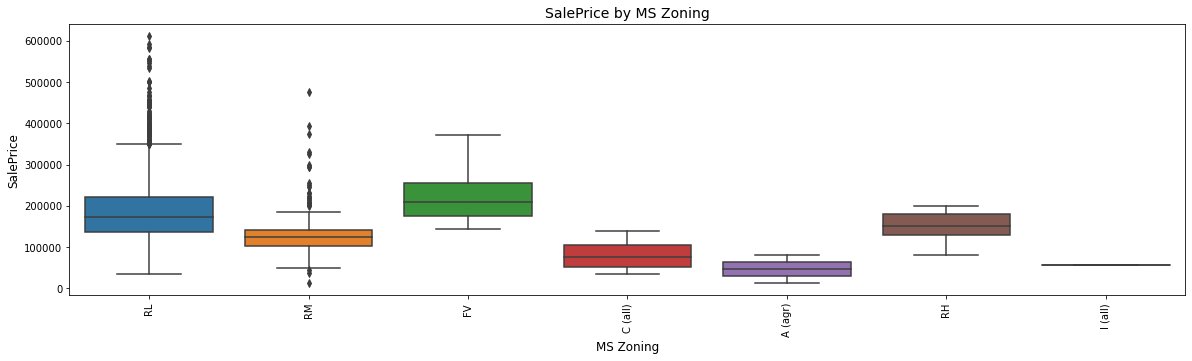

In [65]:
plt.figure(figsize=(20,5))

plt.subplot(1,1,1)
boxplot(train,'MS Zoning','SalePrice','SalePrice by MS Zoning')

We notice that properties of FV -- Floating Village Residential have a higher median over all the others. On the other hand, C(all) -- Commercial properties have the lowest. We can also observe that there are a lot of outliers in properties classified as RL -- Residential Low Density. Probably this is because on this RL properties can be found in two situations: Houses in poor zones, where the houses are separated from each other and have low value. And richer neighbourhoods with big houses where the houses are also separated from each other.

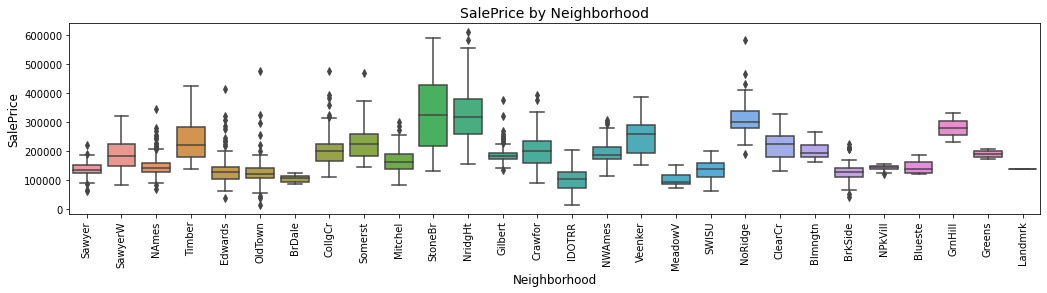

In [66]:
plt.figure(figsize=(80,3.5))

plt.subplot(1,4,1)
boxplot(train,'Neighborhood','SalePrice','SalePrice by Neighborhood')

Some neighborhoods have a much higher price tag associated with their houses (e.g. StoneBr). Some neighborhood (e.g. StoneBr) can share similar characteristics with another (e.g. NridgHt), resulting in them having nearly similar median price values that do not exceed each others' interquartile ranges.
At the same time, they can be so different from others (compare between StoneBr and Mitchel) that their interquartile ranges do not intersect on the sale price scale.

## Distribution of Numeric Columns

### Examine target variable - `SalePrice`
Let's start with examining the target varible first.

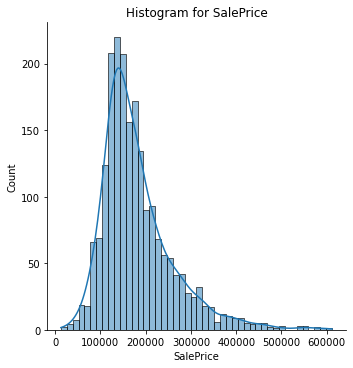

In [67]:
sns.displot(train['SalePrice'], kde=True)
plt.title("Histogram for SalePrice")
plt.show()

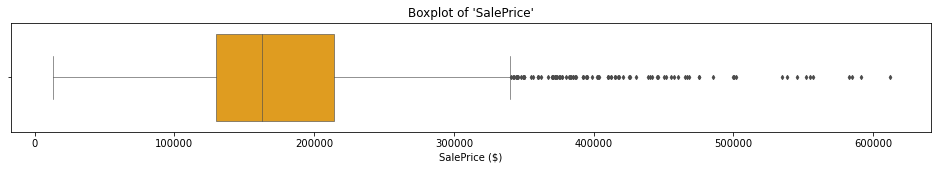

In [68]:
fig, ax = plt.subplots(figsize=(16.5,2), ncols=1)

sns.boxplot(data=train, x='SalePrice', color='orange', linewidth=0.6, fliersize=3, ax=ax)
ax.set_title('Boxplot of \'SalePrice\'', fontsize=12)
ax.set_xlabel('SalePrice ($)')

plt.show()

### Baseline of `SalePrice`

In [69]:
train['SalePrice'].mean()

181469.70160897123

### Find Outlier of `SalePrice`

In [70]:
train['SalePrice'].describe().T

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [71]:
#3 stdevs from the mean 
print(f'Four + stdevs from mean {(79258.659352*4)+181469.701609}. Where max is 611657.000000' )
print(f'Three - stdevs from mean {(-79258.659352*3)+181469.701609}. Where min is 12789.000000')

Four + stdevs from mean 498504.33901700005. Where max is 611657.000000
Three - stdevs from mean -56306.27644700001. Where min is 12789.000000


In [72]:
train[(train['SalePrice'] > 498504.33901700005)] #13 houses 4 stdevs from the mean. Remove as outliers.

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
81,367,527214050,20,RL,63.0,17423,Pave,2,Lvl,3,...,0,0,0,0,0,0,7,2009,New,501837
138,2331,527210040,60,RL,60.0,18062,Pave,2,HLS,3,...,0,0,0,0,0,0,9,2006,New,545224
151,2333,527212030,60,RL,85.0,16056,Pave,2,Lvl,3,...,0,0,0,0,0,0,7,2006,New,556581
623,457,528176030,20,RL,100.0,14836,Pave,2,HLS,3,...,0,0,0,0,0,0,2,2009,WD,552000
800,1702,528118050,20,RL,59.0,17169,Pave,1,Lvl,3,...,0,0,0,0,0,0,8,2007,New,500067
823,16,527216070,60,RL,47.0,53504,Pave,1,HLS,3,...,0,0,210,0,0,0,6,2010,WD,538000
1164,424,528106020,20,RL,105.0,15431,Pave,3,Lvl,3,...,0,0,170,0,0,0,4,2009,WD,555000
1227,47,528176010,20,RL,110.0,14300,Pave,3,HLS,3,...,0,0,0,0,0,0,6,2010,WD,500000
1592,2335,527214060,60,RL,82.0,16052,Pave,2,Lvl,3,...,0,0,0,0,0,0,7,2006,New,535000
1671,45,528150070,20,RL,100.0,12919,Pave,2,Lvl,3,...,0,0,0,0,0,0,3,2010,New,611657


In [73]:
#dropping houses with prices > 4stdevs from average. There are no houses with <3 stdevs from average
train = train[(train['SalePrice'] < 498504.33901700005)]

The distribution of the Sale Price data appeared to have a slightly right skew.  Majority of property living space sizes fall between about ($)100,000 to 200,000. The baseline score are calculated based on the mean of the housing sale price, which are ($)178,601.37. This is in alignment with our observation from the distribution of the Sale Price. 

It also show that outlier sale price of >$498,504.

We further examine on relationship between all numeric columns vs sales price in the following evaluation.

In [74]:
corr = train.corr()
corr['SalePrice']

Id                -0.042487
PID               -0.244161
MS SubClass       -0.080632
Lot Frontage       0.330487
Lot Area           0.270822
Lot Shape         -0.290636
Utilities          0.027515
Land Slope        -0.041285
Overall Qual       0.804572
Overall Cond      -0.088361
Year Built         0.583384
Year Remod/Add     0.562523
Mas Vnr Area       0.464037
Exter Qual         0.704185
Exter Cond         0.039477
Bsmt Qual          0.614086
Bsmt Cond          0.238680
Bsmt Exposure      0.411477
BsmtFin Type 1     0.359271
BsmtFin SF 1       0.413914
BsmtFin Type 2    -0.000246
BsmtFin SF 2      -0.004200
Bsmt Unf SF        0.185886
Total Bsmt SF      0.612950
Heating QC         0.467285
Electrical         0.258120
1st Flr SF         0.602746
2nd Flr SF         0.248961
Low Qual Fin SF   -0.041383
Gr Liv Area        0.687602
Bsmt Full Bath     0.067699
Bsmt Half Bath    -0.003574
Full Bath          0.537251
Half Bath          0.275373
Bedroom AbvGr      0.135401
Kitchen AbvGr     -0

Now that we know which features correlates most with our target variable we can investigate them more in depth. We selected those features with >50% correlated to `SalePrice` to further evaluate. Those columns include `Overall Qual`, `Year Built`, `Year Remod/Add`, `Mas Vnr Area`, `Exter Qual`, `Bsmt Qual`, `Total Bsmt SF`, `1st Flr SF`, `Gr Liv Area`, `Full Bath`, `Kitchen Qual`, `TotRms AbvGrd`, `Fireplace Qu`, `Garage Finish`, `Garage Area`.

In [75]:
numeric_column = train.loc[:,['Overall Qual', 'Year Built', 'Year Remod/Add', 
                              'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual', 
                              'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
                              'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd',
                              'Fireplace Qu', 'Garage Finish', 'Garage Area']]

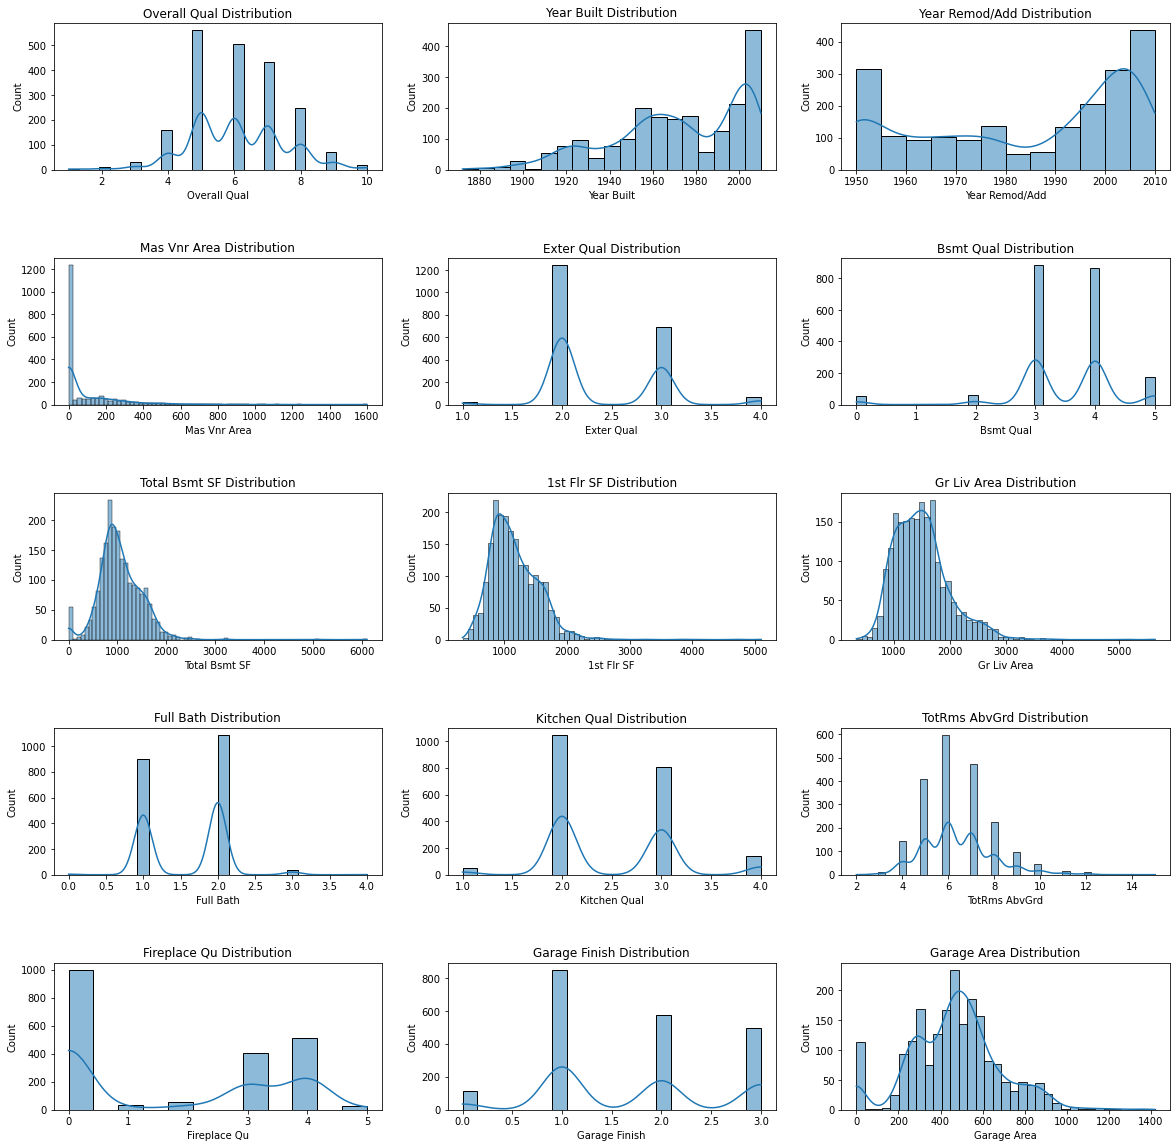

In [76]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
ax = ax.flatten()

for i, var in enumerate(numeric_column):
    sns.histplot(data=train, x=var, kde=True, ax=ax[i])
    ax[i].set_title(f"{var} Distribution")

plt.subplots_adjust(hspace=0.6)
plt.show()

Right skewed distribution observed from 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area'. \
Left skewed distribution odserved from 'Year Built' and 'Year Remod/Add'.\
Bimodal distribution observed from 'Exter Qual', 'Bsmt Qual', 'Full Bath'and 'Kitchen Qual'.\
Multimodal distribution observed from 'Overall Qual'and 'TotRms AbvGrd'.

We will choose the representative metrics to further assess in the following evaluation.

For example, the metrics of 'Total Bsmt SF'(Total square feet of basement area) and '1st Flr SF'(First Floor square feet) can directly rely on is the `Gr Liv Area`(Above grade (ground) living area square feet), which would give us the general size of the living space on the property. By applying the same concept, the metric of `Overall Qual` can also represent metrics such as 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual' and so on. `Year Build` is one of the important metric to further evaluate against saleprice in this dataset. 

### Scatter plot of `Gr Liv Area` vs `SalePrice`

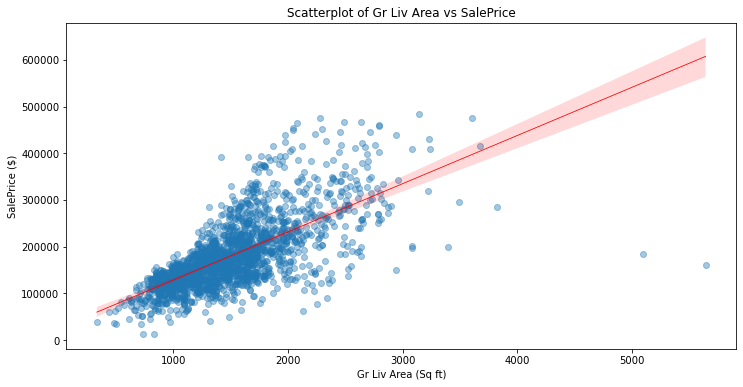

In [77]:
plt.figure(figsize=(12,6))
g = sns.regplot(data=train, x='Gr Liv Area', y='SalePrice', 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8})
plt.xlabel(xlabel='Gr Liv Area (Sq ft)')
plt.ylabel(ylabel='SalePrice ($)')
plt.title(label='Scatterplot of Gr Liv Area vs SalePrice')
plt.show()

### Boxplot of `Gr Liv Area`

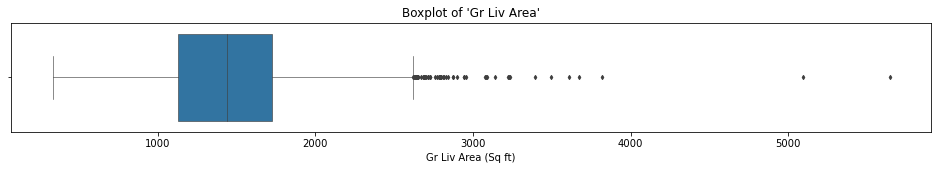

In [78]:
fig, ax = plt.subplots(figsize=(16.5,2), ncols=1)

sns.boxplot(data=train, x='Gr Liv Area', linewidth=0.6, fliersize=3, ax=ax)
ax.set_title('Boxplot of \'Gr Liv Area\'', fontsize=12)
ax.set_xlabel('Gr Liv Area (Sq ft)')

plt.show()

Upward linear regression are observed from this scatter plot, which mean the sale price tend to increase when the ground living area increase. We also notice that majority of property living space sizes are clustered between about 1,000 to 2,000 square feet, and majority prices seem to fall between about ($)100,000 - 200,000.

From the boxplot, we can see that outliers show on the higher side of the scale. There are some property have area >2500 sq ft.

### Scatter plot of `Year Built` vs `SalePrice`

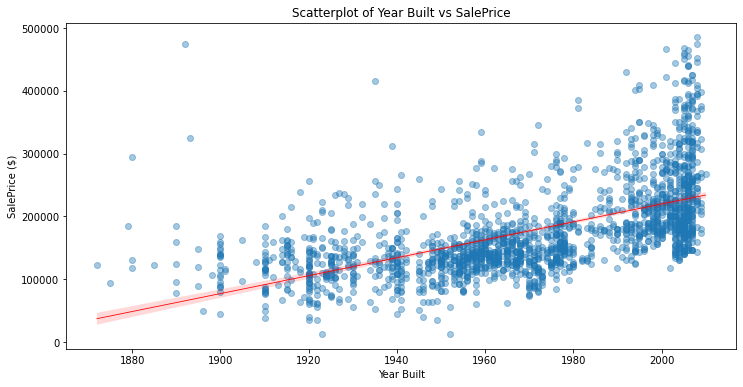

In [79]:
plt.figure(figsize=(12,6))
g = sns.regplot(data=train, x='Year Built', y='SalePrice', 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8})
plt.xlabel(xlabel='Year Built')
plt.ylabel(ylabel='SalePrice ($)')
plt.title(label='Scatterplot of Year Built vs SalePrice')
plt.show()

### Boxplot of `Year Built`

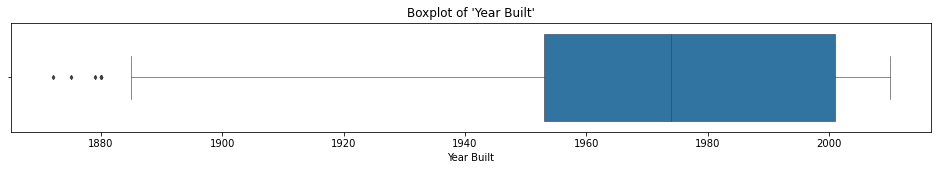

In [80]:
fig, ax = plt.subplots(figsize=(16.5,2), ncols=1)

sns.boxplot(data=train, x='Year Built', linewidth=0.6, fliersize=3, ax=ax)
ax.set_title('Boxplot of \'Year Built\'', fontsize=12)
ax.set_xlabel('Year Built')

plt.show()

There is a linear relationship here between year built and saleprice. We can see from the trend that more people tend to buy houses which is built after year 2000 and at the price range between ($)100,000 - 200,000.

From the boxplot, we can see that outliers show on the lower side of the scale. There are some property which were built before year 1890.

### Scatter plot of `Overall Qual` vs `SalePrice`

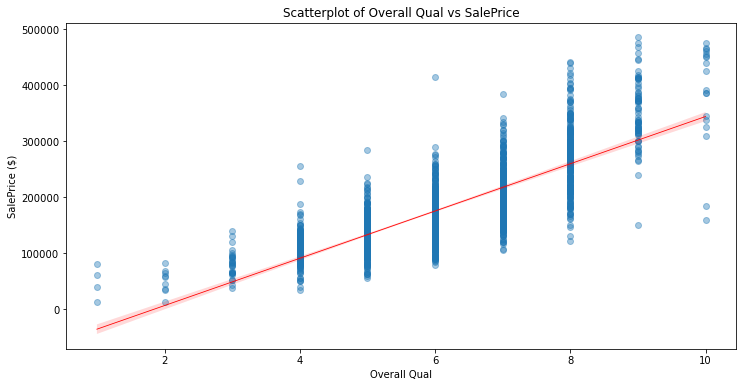

In [81]:
plt.figure(figsize=(12,6))
g = sns.regplot(data=train, x='Overall Qual', y='SalePrice', 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8})
plt.xlabel(xlabel='Overall Qual')
plt.ylabel(ylabel='SalePrice ($)')
plt.title(label='Scatterplot of Overall Qual vs SalePrice')
plt.show()

Boxplot of `Overall Qual`

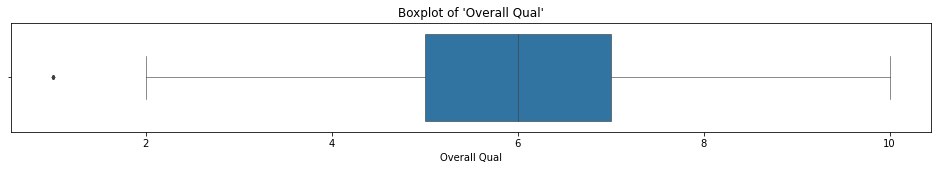

In [82]:
fig, ax = plt.subplots(figsize=(16.5,2), ncols=1)

sns.boxplot(data=train, x='Overall Qual', linewidth=0.6, fliersize=3, ax=ax)
ax.set_title('Boxplot of \'Overall Qual\'', fontsize=12)
ax.set_xlabel('Overall Qual')

plt.show()

It is an upward linear relationship between overall qual - rates the overall material and finish of the house against saleprice. Based on the comparison with scatterplot and boxplot, we can see from the trend that people tend to buy houses at the rating of 5-8 (which are at the condition of average to very good) and at the price range between ($)100,000 - 200,000.

# Summary on EDA
- The distribution of the Sale Price data appeared to have a slightly right skew.  Majority of property living space sizes fall between about ($)100,000 to 200,000. 
- The properties of FV -- Floating Village Residential have a higher median over all the others. On the other hand, C(all) -- Commercial properties have the lowest.
- Some neighborhoods have a much higher price tag associated with their houses (e.g. StoneBr). Some neighborhood (e.g. StoneBr) can share similar characteristics with another (e.g. NridgHt), resulting in them having nearly similar median price values that do not exceed each others' interquartile ranges.
- Upward linear regression are observed for 'Gr Liv Area', 'Year Built' and 'Overall Qual' against `SalePrice`.
- 29 features are selected for modelling based on the EDA. 
- For categorical columns, 14 features - 'MS Zoning', 'Land Contour', 'Lot Config','Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Garage Type', 'Garage Qual', 'Sale Type' are selected as they do not show severely skewed distribution. 
- For numberic columns, another 15 features -- 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd','Fireplace Qu', 'Garage Finish', 'Garage Area' are selected due the strong correlationship shown between numeric features vs saleprice. 

# Preprocessing

## Features Selection

Categorical columns disregard 'Street', 'Condition 2', 'Roof Style', 'Roof Matl', 'Heating', and 'Central Air'

In [83]:
features =  ['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual', 
             'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd',
             'Fireplace Qu', 'Garage Finish', 'Garage Area', 'MS Zoning', 'Land Contour', 'Lot Config',
             'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Exterior 1st', 'Exterior 2nd',
             'Mas Vnr Type', 'Foundation', 'Garage Type', 'Garage Qual', 'Sale Type']
X_train = train[features]
y_train = train['SalePrice']
print('X shape: {}, y shape: {}'.format(X_train.shape, y_train.shape))

X shape: (2038, 29), y shape: (2038,)


In [84]:
X_train.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,...,Condition 1,Bldg Type,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Garage Type,Garage Qual,Sale Type
0,6,1976,2005,289.0,3,3,725.0,725,1479,2,...,RRAe,1Fam,2Story,HdBoard,Plywood,BrkFace,CBlock,Attchd,TA,WD
1,7,1996,1997,132.0,3,4,913.0,913,2122,2,...,Norm,1Fam,2Story,VinylSd,VinylSd,BrkFace,PConc,Attchd,TA,WD
2,5,1953,2007,0.0,2,3,1057.0,1057,1057,1,...,Norm,1Fam,1Story,VinylSd,VinylSd,None,CBlock,Detchd,TA,WD
3,5,2006,2007,0.0,2,4,384.0,744,1444,2,...,Norm,1Fam,2Story,VinylSd,VinylSd,None,PConc,BuiltIn,TA,WD
4,6,1900,1993,0.0,2,2,676.0,831,1445,2,...,Norm,1Fam,1.5Fin,Wd Sdng,Plywood,None,PConc,Detchd,TA,WD


In [85]:
X_val = test[['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual', 
             'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd',
             'Fireplace Qu', 'Garage Finish', 'Garage Area', 'MS Zoning', 'Land Contour', 'Lot Config',
             'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Exterior 1st', 'Exterior 2nd',
              'Mas Vnr Type', 'Foundation', 'Garage Type', 'Garage Qual', 'Sale Type']]
print('X_val shape: {}'.format(X_val.shape))
print('X_train shape: {}'.format(X_train.shape))

X_val shape: (878, 29)
X_train shape: (2038, 29)


In [86]:
X_val.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,...,Condition 1,Bldg Type,House Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Garage Type,Garage Qual,Sale Type
0,6,1910,1950,0.0,2,2,1020,908,1928,2,...,Norm,2fmCon,2Story,AsbShng,AsbShng,None,Stone,Detchd,Po,WD
1,5,1977,1977,0.0,2,4,1967,1967,1967,2,...,Norm,Duplex,1Story,Plywood,Plywood,None,CBlock,Attchd,TA,WD
2,7,2006,2006,0.0,3,4,654,664,1496,2,...,Norm,1Fam,2Story,VinylSd,VinylSd,None,PConc,Attchd,TA,New
3,5,1923,2006,0.0,3,3,968,968,968,1,...,Norm,1Fam,1Story,Wd Sdng,Wd Sdng,None,CBlock,Detchd,Fa,WD
4,6,1963,1963,247.0,2,4,1394,1394,1394,1,...,Norm,1Fam,1Story,Plywood,Plywood,BrkFace,CBlock,Attchd,TA,WD


## Dummify variables for nominal columns

In [87]:
# This function is acquired online from:
# https://github.com/eugeneyan84/Ames-Housing-Data-Analysis/blob/main/code/02_Preprocessing_and_Feature_Engineering.ipynb
X_train = pd.get_dummies(X_train.loc[:,[col for col in X_train.columns]])
print('X shape after get_dummies: {}'.format(X_train.shape))

# possible that a nominal value is not present in one of the nominal columns, resulting in more/lesser columns generated
X_val = pd.get_dummies(X_val.loc[:,[col for col in X_val.columns]])
print('x_val shape after get_dummies: {}'.format(X_val.shape))

X shape after get_dummies: (2038, 144)
x_val shape after get_dummies: (878, 141)


After dummifying, the number of columns between train and test dataset appear to be different. Sychronization of the columns in train and test datasets are required. To solve this problem, we simple cross-check the columns of both datasets against each other, then re-create the missing columns and initializing the whole column to 0 (since we know that the lack of a particular value is what caused the missing dummy column in the 1st place):

In [88]:
# This function is acquired online from:
# https://github.com/eugeneyan84/Ames-Housing-Data-Analysis/blob/main/code/02_Preprocessing_and_Feature_Engineering.ipynb
for col in X_train.columns:
    if col not in X_val.columns:
        print('\'{}\' found missing in X_val, initialising new column with 0s.'.format(col))
        X_val.loc[:,col] = 0
print('\n')
for col in X_val.columns:
    if col not in X_train.columns:
        print('\'{}\' found missing in X_train, initialising new column with 0s.'.format(col))
        X_train.loc[:,col] = 0
print('\n')
print('Check if both datasets have the same set of columns: {}'.format(set(X_train.columns) == set(X_val.columns)))
print('\n')
print('Current number of columns: {}'.format(X_train.shape[1]))

# ensure that column sequence is similar too
column_list = list(X_train.columns)
X_val = X_val.loc[:,column_list]

'MS Zoning_A (agr)' found missing in X_val, initialising new column with 0s.
'Neighborhood_GrnHill' found missing in X_val, initialising new column with 0s.
'Neighborhood_Landmrk' found missing in X_val, initialising new column with 0s.
'Exterior 1st_CBlock' found missing in X_val, initialising new column with 0s.
'Exterior 1st_ImStucc' found missing in X_val, initialising new column with 0s.
'Exterior 1st_Stone' found missing in X_val, initialising new column with 0s.
'Exterior 2nd_Stone' found missing in X_val, initialising new column with 0s.
'Garage Qual_Ex' found missing in X_val, initialising new column with 0s.


'Exterior 1st_PreCast' found missing in X_train, initialising new column with 0s.
'Exterior 2nd_Other' found missing in X_train, initialising new column with 0s.
'Exterior 2nd_PreCast' found missing in X_train, initialising new column with 0s.
'Mas Vnr Type_CBlock' found missing in X_train, initialising new column with 0s.
'Sale Type_VWD' found missing in X_train, initi

In [89]:
print('X_train shape: {}'.format(X_train.shape))
print('X_val shape: {}'.format(X_val.shape))

X_train shape: (2038, 149)
X_val shape: (878, 149)


# Modelling

## Create train and test data using train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (1630, 149)
X_test shape: (408, 149)
y_train shape: (1630,)
y_test shape: (408,)


## Model Prep: Scaling

In [91]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)# the same as doing ss.fit(X_train), then X_train=ss.transform(X_train)
X_test = ss.transform(X_test)

## Baseline score

In [92]:
y_train.mean()

178601.3736196319

## Linear Regression

In [93]:
#Instantiate, fit and score 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [94]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8795957391158415
-3.823411229223405e+22


In [95]:
y_pred = lr.predict(X_train)

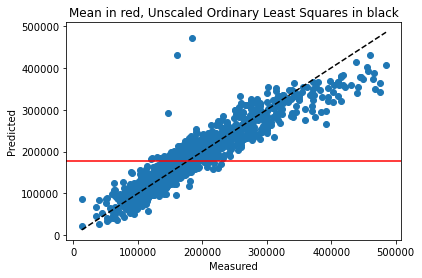

In [96]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred)
ax.plot([y_train.min(), y_train.max()],[y_train.min(),y_train.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Unscaled Ordinary Least Squares in black")
plt.show()

## RidgeCV Regression

In [97]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5 (that is, in logscale). range() that we have used before would not be able to achieve such scales.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
# alphas: pass an Array of alpha values to try. It is still the Regularization strength
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5).fit(X_train, y_train)# fitting 5-fold CV on 100 alphas, that is 500 alphas!

In [98]:
print(ridge_cv.score(X_train, y_train))
print(ridge_cv.score(X_test, y_test))

0.8750560904875947
0.8638488882087307


In [99]:
# getting the optimal value of alpha from ridge cv (out of the list of 100 values)
ridge_cv.alpha_

210.49041445120199

## LassoCV Regression

In [100]:
# Set up a list of Lasso alphas to check.
n_alphas = np.logspace(-3, 3, 500)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=n_alphas, cv=5, max_iter=50000).fit(X_train, y_train);

In [101]:
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.8754555193977827
0.8649679533249368


In [102]:
# getting the optimal value of alpha from ridge cv
lasso_cv.alpha_

401.0572880855496

In [103]:
y_pred_lasso = lasso_cv.predict(X_train)

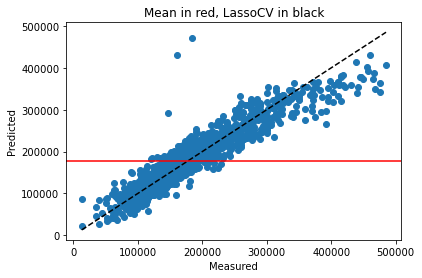

In [104]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred)
ax.plot([y_train.min(), y_train.max()],[y_train.min(),y_train.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, LassoCV in black")
plt.show()

## ElasticNet Regression

In [105]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)# Return evenly spaced numbers over a specified interval

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, cv=5) #l1_ratiofloat, default=0.5

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

0.8707504879133827
0.8655006426719742


In [106]:
y_pred_en = enet_model.predict(X_train)

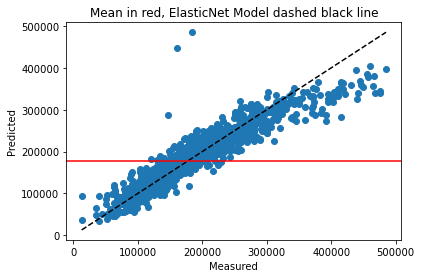

In [107]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_en)
ax.plot([y_train.min(), y_train.max()],[y_train.min(),y_train.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, ElasticNet Model dashed black line")
plt.show()

In [108]:
### Reminder of results from evaluations before this
print(" Linear ".center(18, "="))
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print()
print(" RidgeCV ".center(18, "="))
print(ridge_cv.score(X_train, y_train))
print(ridge_cv.score(X_test, y_test))
print()
print(" LassoCV ".center(18, "="))
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))
print()
print(" ElasticNet ".center(18, "="))
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

===== Linear =====
0.8795957391158415
-3.823411229223405e+22

==== RidgeCV =====
0.8750560904875947
0.8638488882087307

==== LassoCV =====
0.8754555193977827
0.8649679533249368

=== ElasticNet ===
0.8707504879133827
0.8655006426719742


## Evaluation of the Model

In general, the features do a good job passing the test. However, R-squared value shows negative score in the linear regression, which means the chosen model does not follow the trend of the data. Although the model is giving quite good performamce, it is due to over-fitting. Therefore,  linear model with regularization feature are used. Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero. It reduces model variance and thus minimizes overfitting. If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize. In this case, we are exploring RidgeCV, LassoCV and ElaticNet model. Out of these 3 models, it seems like our LassoCV model is the most successful in predicting housing sale prices. The LassoCV demostrate R-squared value of 0.87 in train dataset and 0.86 in test dataset.

Therefore, we use LassoCV to further fit on our testing dataset. This allow us to make prediction of the housing sale price on the testing dataset.


## Fit on Test Dataset to Predict `SalePrice`

In [109]:
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [110]:
ss = StandardScaler()
X_val = ss.fit_transform(X_val)

In [111]:
X_val.shape

(878, 149)

In [112]:
#convert predictions back to dollars
test_prediction = lasso_cv.predict(X_val)

In [113]:
print(type(test_prediction))

<class 'numpy.ndarray'>


In [114]:
test_final = test[['Id']]

In [115]:
saleprice = pd.DataFrame(np.round(test_prediction, 2), columns = ['SalePrice'])

In [116]:
test_final['SalePrice'] = saleprice

In [117]:
test_final.head()

,Id,SalePrice
0,2658,111025.04
1,2718,177783.82
2,2414,205805.32
3,1989,124274.13
4,625,184312.23


In [118]:
test_final.set_index('Id', inplace = True)
test_final.head()

,SalePrice
Id,
2658,111025.04
2718,177783.82
2414,205805.32
1989,124274.13
625,184312.23


## For Kaggle Submission

In [119]:
import os
if not os.path.exists('datasets'):
    os.makedirs('datasets')
test_final.to_csv('datasets/kaggle_test.csv')

# Conclusion
It is clear that regression algorithms can be used to quite accurately (about 86% accurancy) predict the price of houses in Ames, Iowa based on the variables recorded in this dataset.  Additionally there are 29 identified features that greatly impact the price of a house. All these inforamtion would be important for housing developer to take into consideration before developing any housing project in Ames, Iowa as they are helpful to maximize the earning profit as a developer.

## Key takeaways:
- The distribution of the Sale Price data appeared to have a slightly right skew.  Majority of property living space sizes fall between about 100,000(USD) to 200,000(USD). The baseline score are calculated based on the mean of the housing sale price, which are ($)178,601.37. This is in alignment with our observation from the distribution of the Sale Price. 
- 29 features -- 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplace Qu', 'Garage Finish', 'Garage Area', 'MS Zoning', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Garage Type', 'Garage Qual', 'Sale Type' are most likely impact the property sale price of a home in Ames Iowa based on our evaluation.
- LassoCV model is the most successful in predicting housing sale prices out of three regularization models -- RidgeCV, LassoCV and ElaticNet model as it overcomes the over-fitting found in linear regression.


## Recomendations:
- Explore using more features for modelling to check model improvement. 
- Explore the use of non-linear regression models for sale price prediction.
- Make use of available features to further identify features such as housing age or to collect other features such as homebuyer pay-scale.